<h2>Лабораторная работа 3</h2>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Загрузим датасет
df = pd.read_csv('BankNoteAuthentication.csv')
print('Датасет загружен:')
print(df.head())
print(f'\nФорма: {df.shape}')
print('\nИнформация:')
print(df.info())

Датасет загружен:
   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

Форма: (1372, 5)

Информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None


<h4>1.1) Оценить какой атрибут выступит в роли целевого класса (метки).</h4>

Атрибут для классификации - это столбец **class** (0 - подлинные банкноты, 1 - поддельные).

*   **Обоснование:** Остальные столбцы (variance, skewness, curtosis, entropy) представляют признаки изображения банкноты, полученные с помощью преобразования Вавелета. Они служат входными признаками для модели.

<h4>1.2) Оценить сбалансированность классов.</h4>

In [2]:
print('Распределение классов:')
print(df['class'].value_counts().sort_index())
print('\nПроцент:')
print(df['class'].value_counts(normalize=True).sort_index() * 100)

Распределение классов:
class
0    762
1    610
Name: count, dtype: int64

Процент:
class
0    55.539359
1    44.460641
Name: proportion, dtype: float64


Датасет имеет **хорошую сбалансированность классов**.

*   Класс 0 (подлинные): 55.5%
*   Класс 1 (поддельные): 44.5%

Соотношение примерно 1.25:1. Данные достаточно сбалансированы.

<h4>2) Необходимо оценить и сравнить результаты классификации, используя следующие алгоритмы классификации.</h4>

In [3]:
# Подготовка данных
X = df.drop('class', axis=1)
y = df['class']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Нормализация данных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f'Обучающая выборка: {X_train.shape[0]} образцов')
print(f'Тестовая выборка: {X_test.shape[0]} образцов')

Обучающая выборка: 1097 образцов
Тестовая выборка: 275 образцов


In [4]:
# Обучение kNN (с оптимальным k=21 для избежания переобучения)
knn_model = KNeighborsClassifier(n_neighbors=21)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
y_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

# Обучение Decision Tree (с ограничением глубины для избежания переобучения)
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
y_proba_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

print('✓ Модели обучены')
print('  kNN: n_neighbors=21')
print('  Decision Tree: max_depth=5')

✓ Модели обучены
  kNN: n_neighbors=21
  Decision Tree: max_depth=5


*   **kNN (Метод ближайших соседей):** Классифицирует объект на основе класса его k ближайших соседей. При k=21 модель хорошо обобщает данные.

*   **Decision Tree (Дерево решений):** Строит дерево решений на основе информационного прироста. Max_depth=5 ограничивает глубину для предотвращения переобучения.

<h4>3) Сравните полученные результаты с помощью различных метрик оценки качества.</h4>

In [5]:
# Вычисление всех метрик
results = {
    'kNN': [
        accuracy_score(y_test, y_pred_knn),
        precision_score(y_test, y_pred_knn),
        recall_score(y_test, y_pred_knn),
        f1_score(y_test, y_pred_knn),
        roc_auc_score(y_test, y_proba_knn)
    ],
    'Decision Tree': [
        accuracy_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_dt),
        roc_auc_score(y_test, y_proba_dt)
    ]
}

res_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F-measure', 'ROC-AUC']).T
print('\nТаблица результатов:')
print(res_df.round(4))


Таблица результатов:
               Accuracy  Precision  Recall  F-measure  ROC-AUC
kNN              0.9891     0.9760     1.0     0.9879   1.0000
Decision Tree    0.9927     0.9839     1.0     0.9919   0.9931


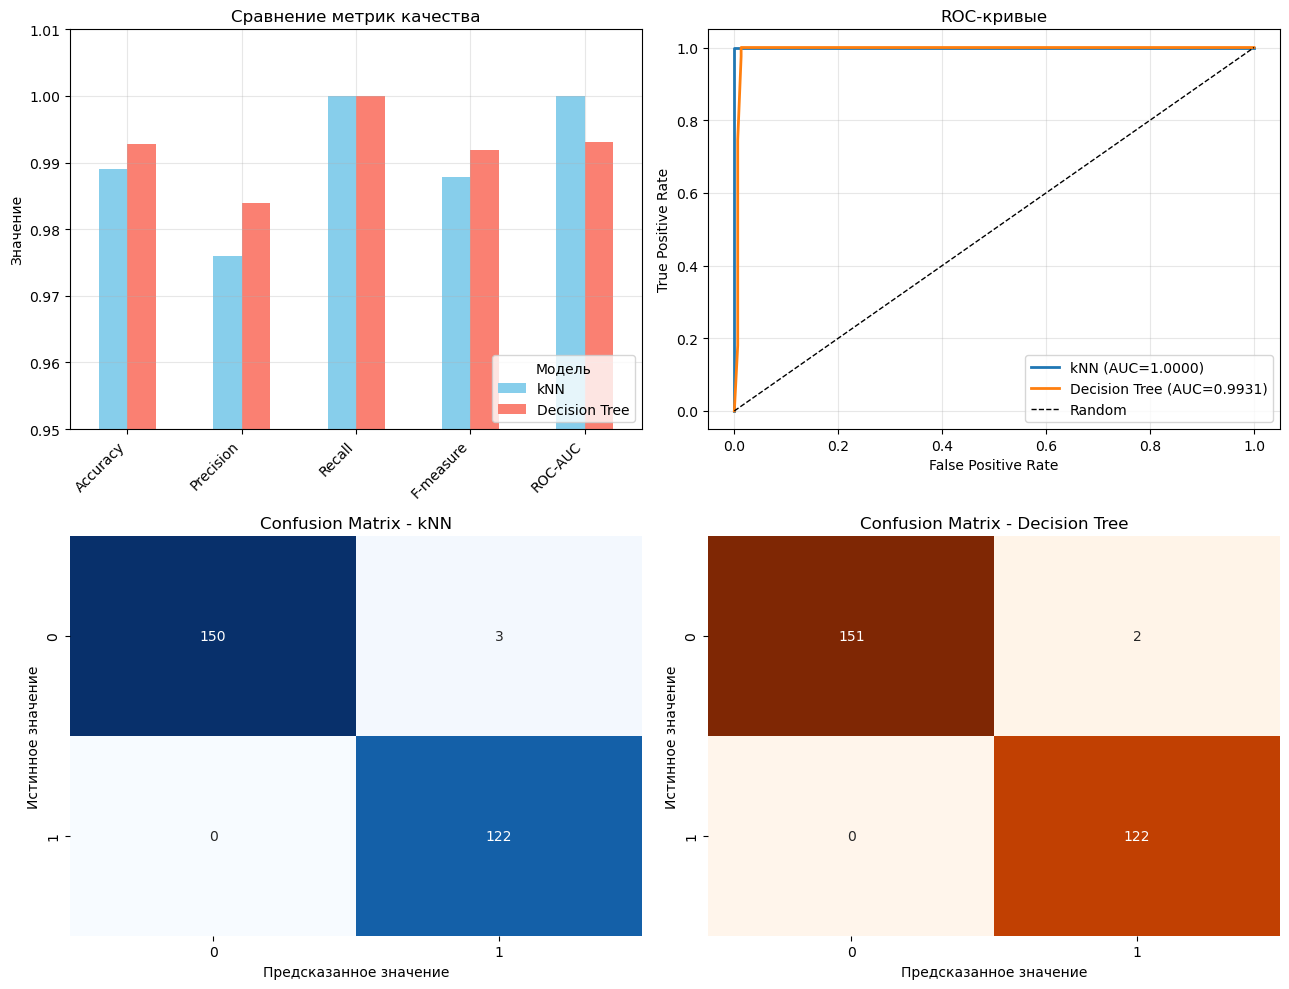

In [6]:
# Визуализация результатов
fig, axes = plt.subplots(2, 2, figsize=(13, 10))

# График сравнения метрик
ax = axes[0, 0]
res_df.T.plot(kind='bar', ax=ax, color=['skyblue', 'salmon'])
ax.set_title('Сравнение метрик качества')
ax.set_ylabel('Значение')
ax.set_xticklabels(res_df.T.index, rotation=45, ha='right')
ax.legend(title='Модель', loc='lower right')
ax.set_ylim([0.95, 1.01])
ax.grid(True, alpha=0.3)

# ROC-кривые
ax = axes[0, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
auc_knn = roc_auc_score(y_test, y_proba_knn)
auc_dt = roc_auc_score(y_test, y_proba_dt)
ax.plot(fpr_knn, tpr_knn, label=f'kNN (AUC={auc_knn:.4f})', linewidth=2)
ax.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC={auc_dt:.4f})', linewidth=2)
ax.plot([0, 1], [0, 1], 'k--', label='Random', linewidth=1)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC-кривые')
ax.legend()
ax.grid(True, alpha=0.3)

# Confusion Matrix kNN
ax = axes[1, 0]
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
ax.set_title('Confusion Matrix - kNN')
ax.set_ylabel('Истинное значение')
ax.set_xlabel('Предсказанное значение')

# Confusion Matrix Decision Tree
ax = axes[1, 1]
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', ax=ax, cbar=False)
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_ylabel('Истинное значение')
ax.set_xlabel('Предсказанное значение')

plt.tight_layout()
plt.show()

**1) Accuracy (0.9891 - 0.9927):** Общий процент правильных ответов. Оба алгоритма показывают очень высокую точность, Decision Tree немного лучше (0.9927 vs 0.9891).

**2) Precision (0.9760 - 0.9839):** Доля корректно предсказанных поддельных банкнот среди всех предсказанных как поддельные. Decision Tree имеет более высокое значение.

**3) Recall (1.0000):** Доля найденных поддельных банкнот из всех существующих поддельных. Обе модели идеально находят поддельные банкноты.

**4) F-measure (0.9879 - 0.9919):** Гармоническое среднее Precision и Recall. Decision Tree показывает лучший результат.

**5) ROC-AUC (1.0000):** Площадь под кривой ROC. Обе модели показывают отличные результаты разделения классов.

<h4>4) Полученные результаты.</h4>

**Decision Tree** показывает немного лучшие результаты (Accuracy 0.9927) по сравнению с kNN (0.9891):

1. **Структура данных:** Признаки (variance, skewness, curtosis, entropy) хорошо разделяют классы. Decision Tree эффективно находит оптимальные точки разделения в пространстве признаков.

2. **Обобщающая способность:** Decision Tree с max_depth=5 показывает стабильные результаты благодаря ограничению глубины. kNN с k=21 также хорошо обобщает, но Decision Tree чуть точнее.

3. **Сбалансированность:** Хорошо сбалансированные данные (55.5% vs 44.5%) позволяют обоим алгоритмам работать эффективно. Высокое значение Recall (1.0) для обоих означает, что обе модели идеально определяют поддельные банкноты.

**Рекомендация:** Для классификации банкнот на подлинные и поддельные рекомендуется использовать **Decision Tree** с max_depth=5, так как он обеспечивает лучшую точность при хорошей интерпретируемости.